<a href="https://colab.research.google.com/github/shestakovm/collabproject/blob/main/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B0%D1%80%D0%BE%D0%BA_%D0%B0%D0%B2%D1%82%D0%BE%D0%BC%D0%BE%D0%B1%D0%B8%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100
from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/My Drive/neural/middle_fmr.zip" -d /content/cars # Указываем путь к базе в Google Drive

In [ ]:
train_path = '/content/cars' #Папка с папками картинок, рассортированных по категориям
batch_size = 25 #Размер выборки
img_width = 96 #Ширина изображения
img_height = 54 #Высота изображения

In [ ]:
datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=10, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.1, #Зумируем изображения при генерации выборки
    horizontal_flip=True, #Включаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    validation_split=0.2 #Указываем разделение изображений на обучающую и тестовую выборку
)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='training' # устанавливаем как набор для обучения
)

Found 2743 images belonging to 3 classes.


In [ ]:
validation_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='validation' # устанавливаем как валидационный набор
)

Found 684 images belonging to 3 classes.


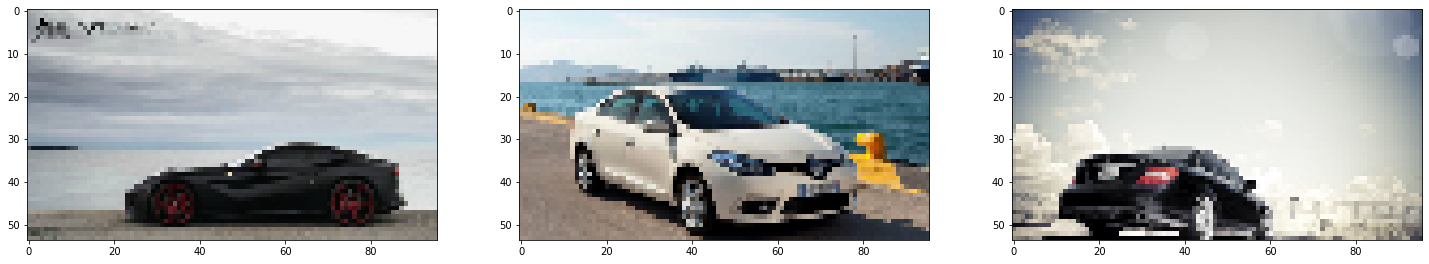

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 3, figsize=(25, 5)) #Создаем полотно из 3 графиков
for i in range(3): #Проходим по всем классам
  car_path = train_path + '/' + os.listdir(train_path)[i] + '/'#Формируем путь к выборке
  img_path = car_path + random.choice(os.listdir(car_path)) #Выбираем случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) #Отображение фотографии

plt.show()

**Создание нейросети**

In [ ]:
model = Sequential()
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
#1
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#2
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#3
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#4
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#5
model.add(Dropout(0.3))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#6
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Dropout(0.3))
 
model.add(Flatten())

model.add(Dense(2048, activation='relu'))

model.add(Dense(4096, activation='relu'))

model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history= model.fit_generator(train_generator, steps_per_epoch=train_generator.samples//batch_size, 
                             validation_data= validation_generator, validation_steps= validation_generator.samples//batch_size,
                             epochs=50, verbose=1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


109/109 [==============================] - 31s 156ms/step - loss: 1.0928 - accuracy: 0.3532 - val_loss: 1.0754 - val_accuracy: 0.4681
Epoch 2/50
109/109 [==============================] - 15s 135ms/step - loss: 0.9587 - accuracy: 0.5276 - val_loss: 0.9647 - val_accuracy: 0.5200
Epoch 3/50
109/109 [==============================] - 15s 139ms/step - loss: 0.9004 - accuracy: 0.5541 - val_loss: 0.9489 - val_accuracy: 0.5052
Epoch 4/50
109/109 [==============================] - 16s 146ms/step - loss: 0.8862 - accuracy: 0.5717 - val_loss: 0.9498 - val_accuracy: 0.5022
Epoch 5/50
109/109 [==============================] - 15s 141ms/step - loss: 0.8787 - accuracy: 0.5754 - val_loss: 0.9597 - val_accuracy: 0.5259
Epoch 6/50
109/109 [==============================] - 15s 141ms/step - loss: 0.8701 - accuracy: 0.5879 - val_loss: 0.9309 - val_accuracy: 0.5363
Epoch 7/50
109/109 [==============================] - 15s 141ms/step - loss: 0.8694 - accuracy: 0.5887 - val_loss: 0.9395 - val_accuracy: 0.5

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=50,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


109/109 [==============================] - 16s 142ms/step - loss: 0.5302 - accuracy: 0.7767 - val_loss: 0.8022 - val_accuracy: 0.6815
Epoch 2/50
109/109 [==============================] - 15s 141ms/step - loss: 0.5300 - accuracy: 0.7792 - val_loss: 0.7384 - val_accuracy: 0.7007
Epoch 3/50
109/109 [==============================] - 16s 142ms/step - loss: 0.5058 - accuracy: 0.7936 - val_loss: 0.7431 - val_accuracy: 0.7022
Epoch 4/50
109/109 [==============================] - 15s 140ms/step - loss: 0.5013 - accuracy: 0.7954 - val_loss: 0.8045 - val_accuracy: 0.6874
Epoch 5/50
109/109 [==============================] - 15s 140ms/step - loss: 0.5041 - accuracy: 0.7936 - val_loss: 0.7156 - val_accuracy: 0.7126
Epoch 6/50
109/109 [==============================] - 15s 140ms/step - loss: 0.4899 - accuracy: 0.8010 - val_loss: 0.7275 - val_accuracy: 0.6993
Epoch 7/50
109/109 [==============================] - 15s 140ms/step - loss: 0.4876 - accuracy: 0.7940 - val_loss: 0.8536 - val_accuracy: 0.6

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00005), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=50,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


109/109 [==============================] - 16s 142ms/step - loss: 0.4821 - accuracy: 0.8149 - val_loss: 0.6900 - val_accuracy: 0.7393
Epoch 2/50
109/109 [==============================] - 15s 142ms/step - loss: 0.4418 - accuracy: 0.8160 - val_loss: 0.6568 - val_accuracy: 0.7452
Epoch 3/50
109/109 [==============================] - 15s 141ms/step - loss: 0.4246 - accuracy: 0.8297 - val_loss: 0.7048 - val_accuracy: 0.6993
Epoch 4/50
109/109 [==============================] - 15s 140ms/step - loss: 0.3942 - accuracy: 0.8425 - val_loss: 0.6450 - val_accuracy: 0.7333
Epoch 5/50
109/109 [==============================] - 15s 140ms/step - loss: 0.4001 - accuracy: 0.8381 - val_loss: 0.6602 - val_accuracy: 0.7289
Epoch 6/50
109/109 [==============================] - 15s 141ms/step - loss: 0.3844 - accuracy: 0.8469 - val_loss: 0.6696 - val_accuracy: 0.7393
Epoch 7/50
109/109 [==============================] - 15s 140ms/step - loss: 0.3664 - accuracy: 0.8576 - val_loss: 0.7585 - val_accuracy: 0.7

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00008), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=50,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


109/109 [==============================] - 16s 137ms/step - loss: 0.1050 - accuracy: 0.9599 - val_loss: 0.7979 - val_accuracy: 0.7956
Epoch 2/50
109/109 [==============================] - 15s 136ms/step - loss: 0.1610 - accuracy: 0.9444 - val_loss: 0.6426 - val_accuracy: 0.7867
Epoch 3/50
109/109 [==============================] - 15s 137ms/step - loss: 0.0842 - accuracy: 0.9720 - val_loss: 0.6577 - val_accuracy: 0.7852
Epoch 4/50
109/109 [==============================] - 15s 138ms/step - loss: 0.1351 - accuracy: 0.9511 - val_loss: 0.6637 - val_accuracy: 0.7793
Epoch 5/50
109/109 [==============================] - 15s 138ms/step - loss: 0.1431 - accuracy: 0.9503 - val_loss: 0.6695 - val_accuracy: 0.7911
Epoch 6/50
109/109 [==============================] - 15s 140ms/step - loss: 0.0792 - accuracy: 0.9709 - val_loss: 0.8025 - val_accuracy: 0.7985
Epoch 7/50
109/109 [==============================] - 15s 139ms/step - loss: 0.1381 - accuracy: 0.9518 - val_loss: 0.7061 - val_accuracy: 0.8

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00005), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=50,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


109/109 [==============================] - 16s 141ms/step - loss: 0.0169 - accuracy: 0.9952 - val_loss: 1.2427 - val_accuracy: 0.8000
Epoch 2/50
109/109 [==============================] - 15s 140ms/step - loss: 0.0367 - accuracy: 0.9879 - val_loss: 0.9582 - val_accuracy: 0.8089
Epoch 3/50
109/109 [==============================] - 15s 140ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.9385 - val_accuracy: 0.8163
Epoch 4/50
109/109 [==============================] - 15s 138ms/step - loss: 0.0314 - accuracy: 0.9879 - val_loss: 1.1956 - val_accuracy: 0.7748
Epoch 5/50
109/109 [==============================] - 15s 137ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.7842 - val_accuracy: 0.8356
Epoch 6/50
109/109 [==============================] - 15s 139ms/step - loss: 0.0066 - accuracy: 0.9974 - val_loss: 1.0531 - val_accuracy: 0.8193
Epoch 7/50
109/109 [==============================] - 15s 140ms/step - loss: 0.0196 - accuracy: 0.9934 - val_loss: 1.0417 - val_accuracy: 0.8

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00002), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=50,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


109/109 [==============================] - 15s 135ms/step - loss: 0.0057 - accuracy: 0.9996 - val_loss: 1.1627 - val_accuracy: 0.8237
Epoch 2/50
109/109 [==============================] - 15s 135ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 1.1563 - val_accuracy: 0.8193
Epoch 3/50
109/109 [==============================] - 15s 136ms/step - loss: 0.0053 - accuracy: 0.9982 - val_loss: 1.1950 - val_accuracy: 0.8178
Epoch 4/50
109/109 [==============================] - 15s 135ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 1.1839 - val_accuracy: 0.8326
Epoch 5/50
109/109 [==============================] - 15s 136ms/step - loss: 0.0038 - accuracy: 0.9985 - val_loss: 1.2507 - val_accuracy: 0.8222
Epoch 6/50
109/109 [==============================] - 15s 138ms/step - loss: 0.0084 - accuracy: 0.9978 - val_loss: 1.1747 - val_accuracy: 0.8222
Epoch 7/50
109/109 [==============================] - 15s 139ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 1.1354 - val_accuracy: 0.8

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00002), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=50,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


109/109 [==============================] - 16s 141ms/step - loss: 8.3801e-04 - accuracy: 0.9996 - val_loss: 1.4448 - val_accuracy: 0.8370
Epoch 2/50
109/109 [==============================] - 15s 140ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 1.3860 - val_accuracy: 0.8267
Epoch 3/50
109/109 [==============================] - 15s 140ms/step - loss: 2.6891e-04 - accuracy: 1.0000 - val_loss: 1.4256 - val_accuracy: 0.8267
Epoch 4/50
109/109 [==============================] - 15s 139ms/step - loss: 0.0025 - accuracy: 0.9989 - val_loss: 1.8299 - val_accuracy: 0.7985
Epoch 5/50
109/109 [==============================] - 15s 138ms/step - loss: 0.0158 - accuracy: 0.9971 - val_loss: 1.5939 - val_accuracy: 0.8207
Epoch 6/50
109/109 [==============================] - 15s 139ms/step - loss: 0.0068 - accuracy: 0.9971 - val_loss: 1.4599 - val_accuracy: 0.8237
Epoch 7/50
109/109 [==============================] - 15s 139ms/step - loss: 0.0052 - accuracy: 0.9978 - val_loss: 1.6928 - val_accur

На последней эпохе обучения полученная точность распознавания 83,4%

Максимальная точность распознавания 84,4%